In [ ]:
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
import pandas as pd

df = pd.read_csv('/content/daily-min-temperatures.xls', header=0, parse_dates=['Date'], index_col='Date')

df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


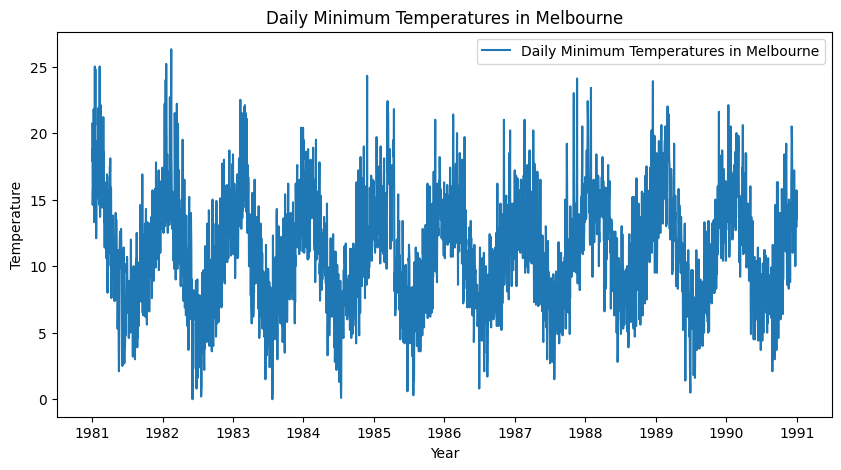

In [ ]:
# Plot the dataset
plt.figure(figsize=(10, 5))
plt.plot(df, label="Daily Minimum Temperatures ")
plt.title("Daily Minimum Temperatures in Melbourne")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [ ]:
# Split data into training and test sets (90% train, 20% test)
train_size = int(len(df)*0.8)
train, test = df.iloc[train_size], df.iloc[train_size:]

In [ ]:
# Define range of ARIMA parameters
p_values = range(0, 4) # AR terms
d_values = range(0, 3) # Differecing terms
d_value = range(0, 4)  # MA terms

best_rmse, best_cfg = float("inf"), None

In [ ]:
#perform grid search
for p,d,q in itertools.product(p_values,d_values,q_values):
    try:
      model = ARIMA(train,order=order)
      model_fit = model.fit()
      predictions = model_fit.forecast(steps=len(test))
      rmse = sqrt(mean_squared_error(test,predictions))

      if rmse < best_rmse:
        best_rmse , best_cfg = rmse, order

      print(f'ARIMA {order} RMSE={rmse:.4f}')
    except:
        continue

#print best model
print(f"\nBest ARIMA Model: {best_cfg} with RMSE:{best_rmse:.4f}")

ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3, 2, 3) RMSE=3019.2579
ARIMA (3

In [ ]:
from typing_extensions import final
best_p, best_d, best_q = best_cfg
final_model = ARIMA(train, order=(best_p, best_d, best_q))
final_model_fit = final_model.fit()

In [ ]:
final_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     1989-01-01 00:00:00   No. Observations:                    1
Model:                  ARIMA(3, 2, 3)   Log Likelihood                   0.000
Date:                 Fri, 04 Apr 2025   AIC                             14.000
Time:                         10:04:28   BIC                                nan
Sample:                              0   HQIC                               nan
                                   - 1                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2               0         -0        nan        nan           0           0
ar.L3               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ma.L2               0         -0        nan        nan           0           0
ma.L3               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
future_predictions = final_model_fit.forecast(steps=360)

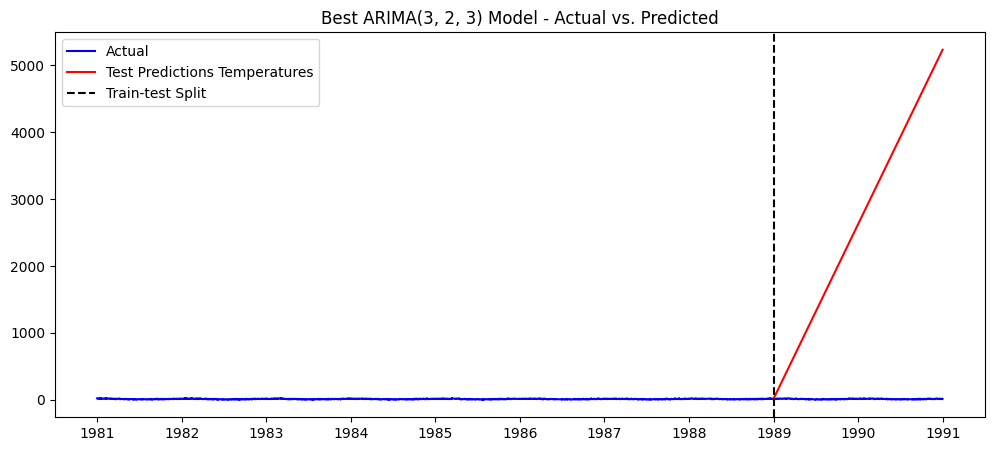

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df, label="Actual", color='blue')
plt.plot(test.index, predictions, label="Test Predictions Temperatures", color='red')
plt.axvline(x=test.index[0], linestyle="--", color="black",label="Train-test Split")
plt.title(f"Best ARIMA{best_cfg} Model - Actual vs. Predicted")
plt.legend()
plt.show()